In [1]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import requests library
import requests
# Import API key
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [6]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | coquimbo
Processing Record 2 of Set 1 | ust-nera
Processing Record 3 of Set 1 | clyde river
Processing Record 4 of Set 1 | altay
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | gabu
Processing Record 7 of Set 1 | lorengau
Processing Record 8 of Set 1 | rocha
Processing Record 9 of Set 1 | totma
Processing Record 10 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 11 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | batagay-alyta
Processing Record 14 of Set 1 | nikolskoye
Processing Record 15 of Set 1 | bambous virieux
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | peniche
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | avarua
Processing Record 22 of Set 1 | qaanaaq
Processing Record 23 of Set 1 | khatanga
Processin

Processing Record 40 of Set 4 | east london
Processing Record 41 of Set 4 | ocos
Processing Record 42 of Set 4 | vryheid
Processing Record 43 of Set 4 | basco
Processing Record 44 of Set 4 | klamath falls
Processing Record 45 of Set 4 | san policarpo
Processing Record 46 of Set 4 | gvardeysk
Processing Record 47 of Set 4 | miloslavskoye
Processing Record 48 of Set 4 | aguada de cima
Processing Record 49 of Set 4 | jayanca
Processing Record 50 of Set 4 | elizabeth city
Processing Record 1 of Set 5 | gibsons
Processing Record 2 of Set 5 | gamboula
Processing Record 3 of Set 5 | faya
Processing Record 4 of Set 5 | atar
Processing Record 5 of Set 5 | ambilobe
Processing Record 6 of Set 5 | puerto leguizamo
Processing Record 7 of Set 5 | katsuura
Processing Record 8 of Set 5 | nemuro
Processing Record 9 of Set 5 | antalaha
Processing Record 10 of Set 5 | gogrial
Processing Record 11 of Set 5 | klaksvik
Processing Record 12 of Set 5 | cap malheureux
Processing Record 13 of Set 5 | alotau
Cit

Processing Record 29 of Set 8 | tupik
Processing Record 30 of Set 8 | tigzirt
Processing Record 31 of Set 8 | slagelse
Processing Record 32 of Set 8 | englewood
Processing Record 33 of Set 8 | los llanos de aridane
Processing Record 34 of Set 8 | richards bay
Processing Record 35 of Set 8 | labutta
City not found. Skipping...
Processing Record 36 of Set 8 | marawi
Processing Record 37 of Set 8 | madimba
Processing Record 38 of Set 8 | saint george
Processing Record 39 of Set 8 | roald
Processing Record 40 of Set 8 | crab hill
City not found. Skipping...
Processing Record 41 of Set 8 | bagotville
Processing Record 42 of Set 8 | lagos
Processing Record 43 of Set 8 | jalu
Processing Record 44 of Set 8 | port moresby
Processing Record 45 of Set 8 | stupava
Processing Record 46 of Set 8 | altagracia de orituco
Processing Record 47 of Set 8 | mount gambier
Processing Record 48 of Set 8 | hihifo
City not found. Skipping...
Processing Record 49 of Set 8 | utiroa
City not found. Skipping...
Pro

Processing Record 15 of Set 12 | oussouye
Processing Record 16 of Set 12 | oriximina
Processing Record 17 of Set 12 | bilma
Processing Record 18 of Set 12 | lakes entrance
Processing Record 19 of Set 12 | zhigansk
Processing Record 20 of Set 12 | udachnyy
Processing Record 21 of Set 12 | nuuk
Processing Record 22 of Set 12 | sao joao da barra
Processing Record 23 of Set 12 | padang
Processing Record 24 of Set 12 | berekum
Processing Record 25 of Set 12 | hovd
Processing Record 26 of Set 12 | ukiah
Processing Record 27 of Set 12 | karaul
City not found. Skipping...
Processing Record 28 of Set 12 | ukrayinka
Processing Record 29 of Set 12 | cidreira
Processing Record 30 of Set 12 | yagodnoye
Processing Record 31 of Set 12 | ivanava
Processing Record 32 of Set 12 | port-cartier
Processing Record 33 of Set 12 | cockburn harbour
City not found. Skipping...
Processing Record 34 of Set 12 | dhali
Processing Record 35 of Set 12 | deloraine
Processing Record 36 of Set 12 | yulara
Processing Rec

In [13]:
len(city_data)

561

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Coquimbo,-29.9533,-71.3436,62.33,67,0,13.80,CL,2021-08-01 19:23:31
1,Ust-Nera,64.5667,143.2000,45.12,82,1,4.85,RU,2021-08-01 19:23:31
2,Clyde River,70.4692,-68.5914,43.03,87,90,13.80,CA,2021-08-01 19:23:31
3,Altay,47.8667,88.1167,60.15,50,53,3.60,CN,2021-08-01 19:23:32
4,Mataura,-46.1927,168.8643,39.47,98,64,3.74,NZ,2021-08-01 19:18:47
5,Gabu,12.2833,-14.2167,75.99,94,95,6.93,GW,2021-08-01 19:23:32
6,Lorengau,-2.0226,147.2712,82.18,76,95,9.48,PG,2021-08-01 19:21:14
7,Rocha,-34.4833,-54.3333,55.31,72,5,6.96,UY,2021-08-01 19:20:29
8,Totma,59.9747,42.7642,60.55,99,100,2.62,RU,2021-08-01 19:23:33
9,Rikitea,-23.1203,-134.9692,69.33,59,100,23.89,PF,2021-08-01 19:22:38


In [15]:
#Resorting Data Frame
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed" ]
city_data_df = city_data_df[new_column_order]
city_data_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Coquimbo,CL,2021-08-01 19:23:31,-29.9533,-71.3436,62.33,67,0,13.80
1,Ust-Nera,RU,2021-08-01 19:23:31,64.5667,143.2000,45.12,82,1,4.85
2,Clyde River,CA,2021-08-01 19:23:31,70.4692,-68.5914,43.03,87,90,13.80
3,Altay,CN,2021-08-01 19:23:32,47.8667,88.1167,60.15,50,53,3.60
4,Mataura,NZ,2021-08-01 19:18:47,-46.1927,168.8643,39.47,98,64,3.74


In [16]:
#Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
#Export the City_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
## Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

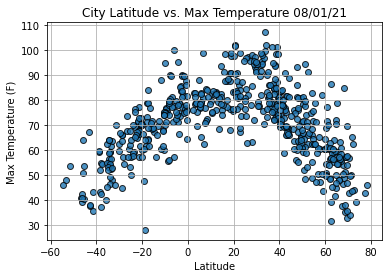

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

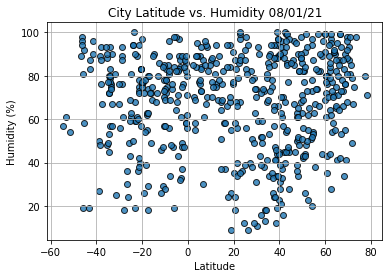

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/City_Latitude_vs_Humidity.png")

# Show plot.
plt.show()

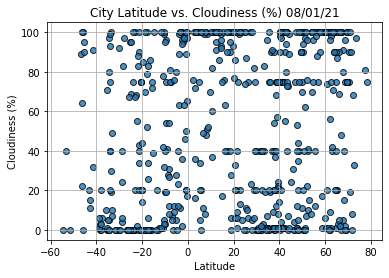

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/City_Latitude_vs_Cloudiness.png")
# Show plot.
plt.show()

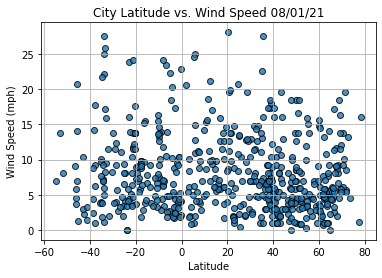

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/City_Latitude_vs_Wind_Speed.png")
# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

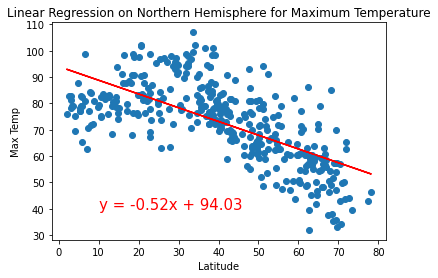

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plt.title('Linear Regression on Northern Hemisphere for Maximum Temperature')
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

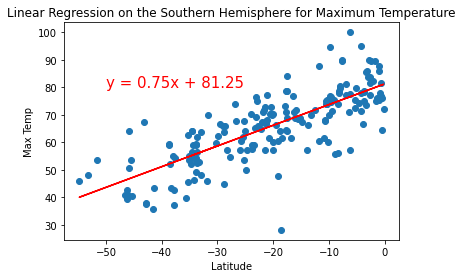

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plt.title("Linear Regression on the Southern Hemisphere for Maximum Temperature")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,80))

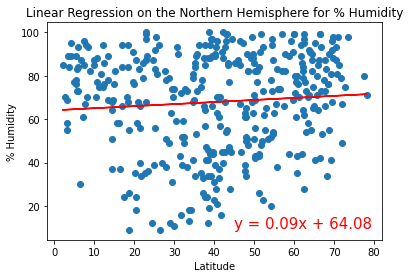

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plt.title("Linear Regression on the Northern Hemisphere for % Humidity")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(45,10))

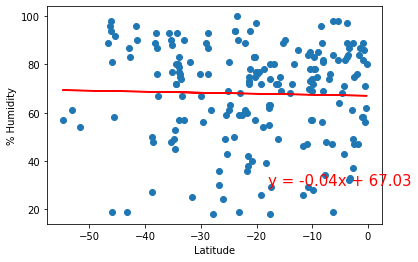

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-18,30))

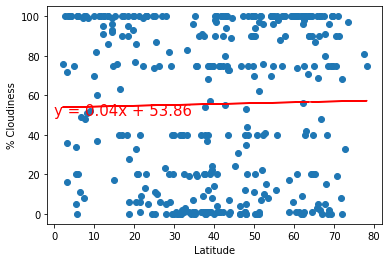

In [28]:
# Linear regression on the Northern Hemisphere for  Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(0,50))

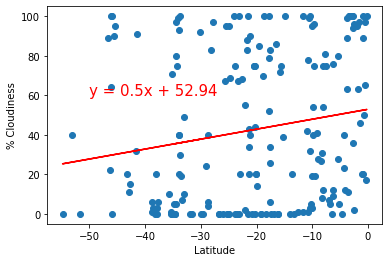

In [29]:
# Linear regression on the Southern Hemisphere for Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

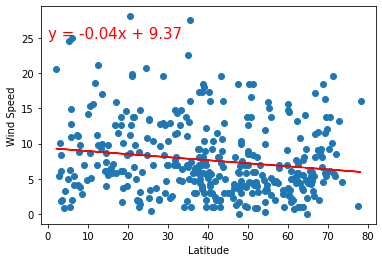

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(0,25))

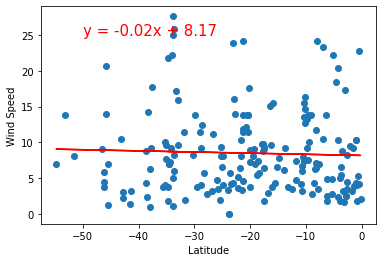

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed', (-50,25))